## Creating a Jupyter Notebook file

In [13]:
import nltk
import pyodide_http
pyodide_http.patch_all()
import matplotlib
%matplotlib inline
%pip install tk
import tk

In [6]:
# nltk.download('all-corpora') this is overkill! 
nltk.download('genesis')
nltk.download('gutenberg')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('treebank')
nltk.download('webtext')
nltk.download('wordnet')

[nltk_data] Downloading package genesis to /home/pyodide/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/pyodide/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package inaugural to
[nltk_data]     /home/pyodide/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package nps_chat to /home/pyodide/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.
[nltk_data] Downloading package treebank to /home/pyodide/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package webtext to /home/pyodide/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package wordnet to /home/pyodide/nltk_data...


True

In [7]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Searching for Words

In [8]:
text1.concordance("whale")

Displaying 25 of 1226 matches:
s , and to teach them by what name a whale - fish is to be called in our tongue
t which is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . This ani
ulted ." -- WEBSTER ' S DICTIONARY " WHALE . ... It is more immediately from th
ISH . WAL , DUTCH . HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALE
HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALEINE , FRENCH . BALLE
least , take the higgledy - piggledy whale statements , however authentic , in 
 dreadful gulf of this monster ' s ( whale ' s ) mouth , are immediately lost a
 patient Job ." -- RABELAIS . " This whale ' s liver was two cartloads ." -- ST
 Touching that monstrous bulk of the whale or ork we have received nothing cert
 of oil will be extracted out of one whale ." -- IBID . " HISTORY OF LIFE AND D
ise ." -- KING HENRY . " Very like a whale ." -- HAMLET . " Which to secure , n
restless paine , Like as the wounded whale to shore flies thro ' the maine ." -
. OF SPER

In [11]:
text1.similar("love")

sea man it ship by him hand them whale view ships land me life death
water way head nature fear


In [5]:
text2.similar("love")

affection sister heart mother time see town life it dear elinor

marianne me word family her him do regard head


In [6]:
text5.similar("lol")

join part hi hey and wb well ty lmao yeah hiya ok oh hello you what

yes haha no all


## Positioning Words

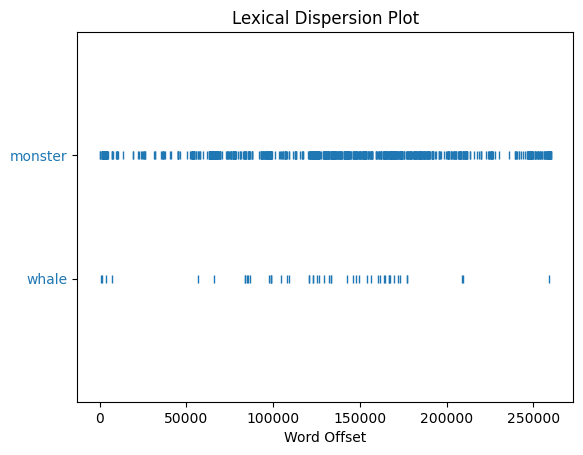

In [14]:
text1.dispersion_plot(["whale", "monster"])

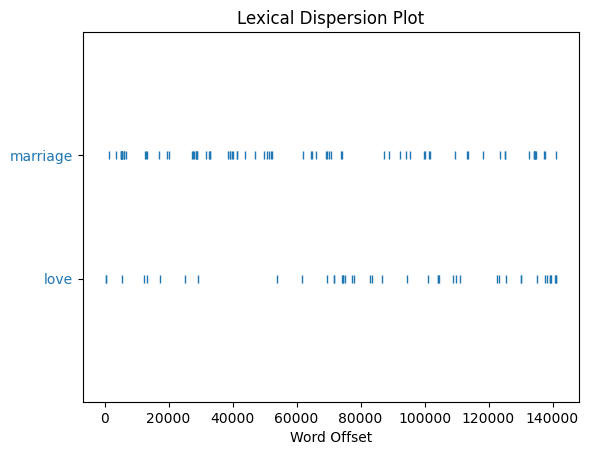

In [15]:
text2.dispersion_plot(["love", "marriage"])

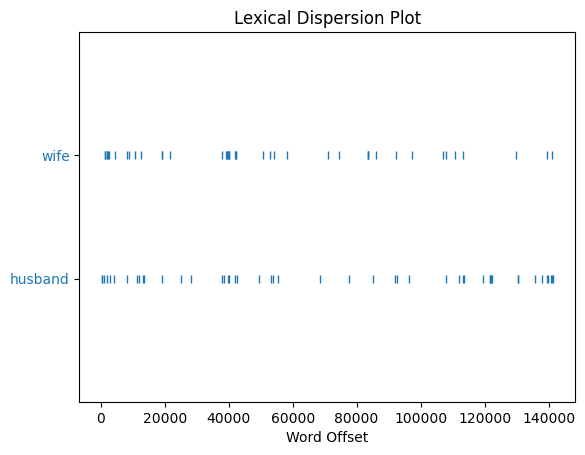

In [14]:
text2.dispersion_plot(["husband", "wife"])

## Types vs. tokens

In [10]:
text1.count("whale")

906

In [11]:
text1.count("Whale")

282

In [12]:
text1.count("WHALE")

38

In [13]:
text1_tokens = []
for t in text1:
    if t.isalpha():
        t = t.lower()
        text1_tokens.append(t)

In [14]:
text1_tokens = [t.lower() for t in text1 if t.isalpha()]

## Length and unique words

In [15]:
text1_tokens.count("whale")

1226

In [16]:
text1_tokens.count("Whale")

0

In [17]:
text1_tokens.count("WHALE")

0

In [18]:
len(text1_tokens)

218361

In [19]:
len(text1)

260819

In [20]:
# Long alternative

x = set(text1_tokens)
len(x)

16948

In [21]:
# Short and sweet alternative
len(set(text1_tokens))

16948

## Lexical density

In [22]:
len(set(text1_tokens)) / len(text1_tokens)

0.07761459234936642

In [23]:
text1_slice = text1_tokens[0:10000]

In [24]:
len(set(text1_slice)) / len(text1_slice)

0.2816

In [25]:
text2_tokens = []
for t in text2:
    if t.isalpha():
        t = t.lower()
        text2_tokens.append(t)
        
text2_slice = text2_tokens[0:10000]

len(set(text2_slice)) / len(text2_slice)

0.1786

## Data Cleaning: removing Stopwords

In [26]:
from nltk.corpus import stopwords

In [27]:
stops = stopwords.words('english')

In [28]:
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
text1_stops = []
for t in text1_tokens:
    if t not in stops:
        text1_stops.append(t)

In [30]:
text1_stops = [t for t in text1_tokens if t not in stops]

In [31]:
print(text1_stops[:30])

['moby', 'dick', 'herman', 'melville', 'etymology', 'supplied', 'late', 'consumptive', 'usher', 'grammar', 'school', 'pale', 'usher', 'threadbare', 'coat', 'heart', 'body', 'brain', 'see', 'ever', 'dusting', 'old', 'lexicons', 'grammars', 'queer', 'handkerchief', 'mockingly', 'embellished', 'gay', 'flags']


In [32]:
len(text1_stops)

110459

In [33]:
len(set(text1_stops))

16802

## Data Cleaning: Lemmatizing Words

In [34]:
from nltk.stem import WordNetLemmatizer

In [35]:
wordnet_lemmatizer = WordNetLemmatizer()

In [36]:
wordnet_lemmatizer.lemmatize("children")

'child'

In [37]:
wordnet_lemmatizer.lemmatize("better")

'better'

In [38]:
wordnet_lemmatizer.lemmatize("better", pos='a')

'good'

In [39]:
text1_clean = []
for t in text1_stops:
    t_lem = wordnet_lemmatizer.lemmatize(t)
    text1_clean.append(t_lem)

In [40]:
text1_clean = [wordnet_lemmatizer.lemmatize(t) for t in text1_stops]

In [41]:
print(len(text1_clean))
print(len(set(text1_clean)))

110459

14750


In [42]:
sorted(set(text1_clean))[:30]

['aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandonedly',
 'abandonment',
 'abased',
 'abasement',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbreviate',
 'abbreviation',
 'abeam',
 'abed',
 'abednego',
 'abel',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abhorring',
 'abide',
 'abided',
 'abiding',
 'ability',
 'abjectly',
 'abjectus',
 'able']

## Data cleaning: Stemming Words

In [43]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

In [44]:
print(porter_stemmer.stem('berry'))
print(porter_stemmer.stem('berries'))
print(wordnet_lemmatizer.lemmatize('berry'))
print(wordnet_lemmatizer.lemmatize('berries'))

berri

berri

berry

berry


In [45]:
print(porter_stemmer.stem('abandon'))
print(porter_stemmer.stem('abandoned'))
print(porter_stemmer.stem('abandonly'))
print(porter_stemmer.stem('abandonment'))

abandon

abandon

abandonli

abandon


In [46]:
t1_porter = []
for t in text1_clean:
    t_stemmed = porter_stemmer.stem(t)
    t1_porter.append(t_stemmed)
    

In [47]:
t1_porter = [porter_stemmer.stem(t) for t in text1_clean]

In [48]:
print(len(set(t1_porter)))
print(sorted(set(t1_porter))[:30])

10501

['aback', 'abaft', 'abandon', 'abandonedli', 'abas', 'abash', 'abat', 'abbrevi', 'abe', 'abeam', 'abednego', 'abel', 'abhor', 'abhorr', 'abid', 'abil', 'abjectli', 'abjectu', 'abl', 'ablut', 'aboard', 'abod', 'abomin', 'aborigin', 'abort', 'abound', 'aboundingli', 'abraham', 'abreast', 'abridg']


## Data cleaning: results


In [49]:
my_dist = FreqDist(text1_clean)

In [50]:
type(my_dist)

nltk.probability.FreqDist

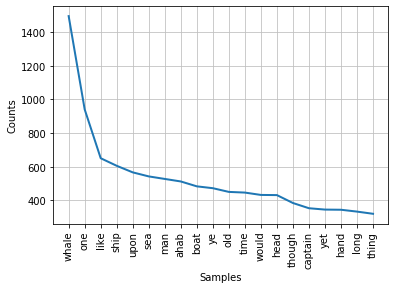

In [51]:
my_dist.plot(20)

In [52]:
my_dist.most_common(20)

[('whale', 1494),
 ('one', 940),
 ('like', 650),
 ('ship', 605),
 ('upon', 566),
 ('sea', 542),
 ('man', 527),
 ('ahab', 512),
 ('boat', 483),
 ('ye', 472),
 ('old', 450),
 ('time', 446),
 ('would', 432),
 ('head', 431),
 ('though', 384),
 ('captain', 353),
 ('yet', 345),
 ('hand', 344),
 ('long', 333),
 ('thing', 320)]

In [53]:
b_words = ['god', 'apostle', 'angel']

In [54]:
my_list = []
for word in b_words:
    if word in text1_clean:
        my_list.append(word)
    else:
        pass
                    

In [55]:
print(my_list)

['god', 'angel']


In [56]:
my_list2 = [word for word in b_words if word in text1_clean]

In [57]:
my_list == my_list2

True

## Make Your Own Corpus

In [58]:
from urllib.request import urlopen

In [59]:
my_url = "http://www.gutenberg.org/files/996/996-0.txt"

In [60]:
file = urlopen(my_url)
raw = file.read()

In [61]:
don = raw.decode()

In [62]:
type(don)

str

In [63]:
don_tokens = nltk.word_tokenize(don)

In [64]:
len(don_tokens)

498721

In [65]:
don_tokens[:10]

['\ufeff',
 'The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'History',
 'of',
 'Don']

In [66]:
dq_text = don_tokens[320:]

In [67]:
print(dq_text[:30])

['I', 'CHAPTER', 'I', 'WHICH', 'TREATS', 'OF', 'THE', 'CHARACTER', 'AND', 'PURSUITS', 'OF', 'THE', 'FAMOUS', 'GENTLEMAN', 'DON', 'QUIXOTE', 'OF', 'LA', 'MANCHA', 'CHAPTER', 'II', 'WHICH', 'TREATS', 'OF', 'THE', 'FIRST', 'SALLY', 'THE', 'INGENIOUS', 'DON']


In [68]:
dq_nltk_text = nltk.Text(dq_text)

In [69]:
type(dq_nltk_text)

nltk.text.Text

In [70]:
dq_clean = []
for word in dq_text:
    if word.isalpha():
        if word.lower() not in stops:
            dq_clean.append(word.lower())
print(dq_clean[:50])

['chapter', 'treats', 'character', 'pursuits', 'famous', 'gentleman', 'quixote', 'la', 'mancha', 'chapter', 'ii', 'treats', 'first', 'sally', 'ingenious', 'quixote', 'made', 'home', 'chapter', 'iii', 'wherein', 'related', 'droll', 'way', 'quixote', 'dubbed', 'knight', 'chapter', 'iv', 'happened', 'knight', 'left', 'inn', 'chapter', 'v', 'narrative', 'knight', 'mishap', 'continued', 'chapter', 'vi', 'diverting', 'important', 'scrutiny', 'curate', 'barber', 'made', 'library', 'ingenious', 'gentleman']


In [71]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

dq_lemmatized = []
for t in dq_clean:
    dq_lemmatized.append(wordnet_lemmatizer.lemmatize(t))

## Part-of-Speech Tagging

In [72]:
dq_tagged = nltk.pos_tag(dq_text)

In [73]:
print(dq_tagged[:10])

[('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('WHICH', 'NNP'), ('TREATS', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CHARACTER', 'NNP'), ('AND', 'NNP'), ('PURSUITS', 'NNP')]


In [74]:
tag_dict = {}
# for every word/tag pair in my list,
for (word, tag) in dq_tagged:
    if tag in tag_dict:
        tag_dict[tag]+=1
    else:
        tag_dict[tag] = 1

In [75]:
tag_dict

{'PRP': 36100,
 'VBP': 9658,
 'NNP': 31836,
 'IN': 57945,
 'VBD': 23503,
 ',': 36910,
 'CC': 22993,
 'VB': 21198,
 'MD': 7256,
 'DT': 40778,
 ':': 6442,
 'CD': 3108,
 'VBZ': 8316,
 'RP': 1916,
 'JJ': 24445,
 'NN': 62303,
 'WP': 4157,
 'NNS': 15271,
 'RB': 20227,
 'VBN': 10087,
 'WDT': 3546,
 '.': 7119,
 'EX': 1073,
 'TO': 13801,
 'PRP$': 12231,
 'VBG': 7727,
 'RBS': 253,
 'JJS': 954,
 'PDT': 1118,
 'RBR': 655,
 'JJR': 1294,
 'FW': 381,
 '(': 574,
 ')': 574,
 'WP$': 137,
 'WRB': 2147,
 'POS': 14,
 'NNPS': 155,
 'UH': 85,
 "''": 111,
 '$': 3}

In [76]:
tag_dict_sorted = sorted(tag_dict.items(),
                        reverse=True,
                        key=lambda kv: kv[1])
print(tag_dict_sorted)

[('NN', 62303), ('IN', 57945), ('DT', 40778), (',', 36910), ('PRP', 36100), ('NNP', 31836), ('JJ', 24445), ('VBD', 23503), ('CC', 22993), ('VB', 21198), ('RB', 20227), ('NNS', 15271), ('TO', 13801), ('PRP$', 12231), ('VBN', 10087), ('VBP', 9658), ('VBZ', 8316), ('VBG', 7727), ('MD', 7256), ('.', 7119), (':', 6442), ('WP', 4157), ('WDT', 3546), ('CD', 3108), ('WRB', 2147), ('RP', 1916), ('JJR', 1294), ('PDT', 1118), ('EX', 1073), ('JJS', 954), ('RBR', 655), ('(', 574), (')', 574), ('FW', 381), ('RBS', 253), ('NNPS', 155), ('WP$', 137), ("''", 111), ('UH', 85), ('POS', 14), ('$', 3)]
